# Mini Project 3

Part 1:
Build a walking forecasting model till the end of the test data and a single forecast model 5-time steps into the future after the end of the test data, both using the ARIMA method


In [1]:
# import needed libraries and modules

import pandas as pd
import numpy as np
from datetime import datetime as dt
from matplotlib import pyplot as plt
import sklearn

# warning library
import warnings
warnings.simplefilter("ignore")


In [36]:
# read tunnel data
# data from vehicles going through a tunnel from Nov 2003 to Nov 2005

tunnel_data = pd.read_csv('tunnel.csv')
tunnel_data.head()

,Day,NumVehicles
0,2003-11-01,103536
1,2003-11-02,92051
2,2003-11-03,100795
3,2003-11-04,102352
4,2003-11-05,106569


In [37]:
tunnel_data.shape

(747, 2)

In [38]:
tunnel_data.dtypes

Day            object
NumVehicles     int64
dtype: object

In [39]:
# Changing day from object to time variable for data indexing

tunnel_data['Day'] = pd.to_datetime(tunnel_data['Day']) # Convert the Day column to a datetime data type
tunnel_data.set_index('Day',inplace=True) # Set the Day column as index for the dataframe


In [6]:
tunnel_data.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


In [7]:
tunnel_data.dtypes

NumVehicles    int64
dtype: object

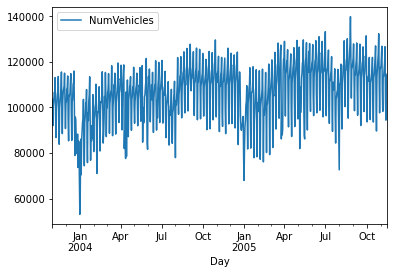

In [8]:
tunnel_data.plot()
plt.show()

In [35]:
# Check 
tunnel_data.tail()


,NumVehicles
Day,
2005-11-12,104646
2005-11-13,94424
2005-11-14,112165
2005-11-15,114296
2005-11-16,114690


<AxesSubplot:xlabel='Day'>

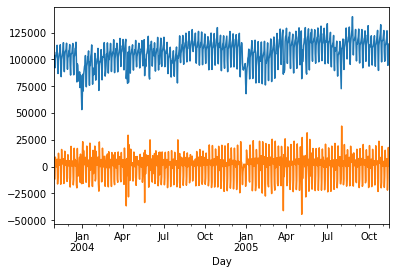

In [10]:
# visualizing data differenced by 1 order
tunnel_data["NumVehicles"].plot()
tunnel_data['NumVehicles'].diff().plot()


In [11]:
# import the required libraries for stationary and ARIMA analysis

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA,ARIMAResults
#from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [12]:
# Checking for stationarity

# Dicky Fuller Stationarity check - if the value is > 0.05 then it is considered non-stationary in general.

print("p-value:", adfuller(tunnel_data)[1]) # Before differencing
print("p-value:", adfuller(tunnel_data.diff().dropna())[1])  # p-value is very close to zero after differencing

# The results below show that a 1 order difference of the data makes the time series stationary
# a 'd' parameter of 1 should work for I

p-value: 0.17835968131776253
p-value: 5.472574121444432e-13


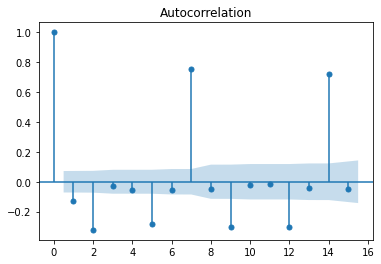

In [13]:
# used to determine the q parameter
plot_acf(tunnel_data.diff().dropna(), lags=15)
plt.show()

# a q parameter of 2 should work because the lag features drop to no correlation afterwards.
# including higher order lag features greater than 2 would not be useful 
# because there are multiple high order lags which have no correlation

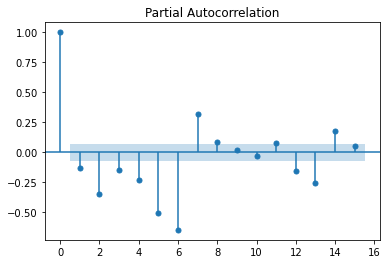

In [14]:
# Using partial autocorrelation to check for parameter 'p' for ARIMA
plot_pacf(tunnel_data.diff().dropna(), lags=15)
plt.show()

# The graph below shows good correlation of lag variables up to lag 7
# a 'p' parameter of 7 should work for AR

In [15]:

# split into tunnel data into train and test sets
X = tunnel_data.values
# traning size is 90% the length of X
training_size = int(0.9*len(X))
train = X[:training_size]
test = X[training_size:]
history = [x for x in train]

In [16]:
type(X)

numpy.ndarray

Test RMSE: 3487.270


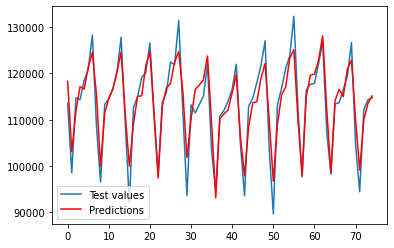

In [17]:
# walk-forward forecasting/validation
predictions = []

for t in range(len(test)):
    # fit model
    tunnel_model = ARIMA(history, order=(7,1,2))
    model_fit = tunnel_model.fit(disp=0)
    # one step forecast
    yhat = model_fit.forecast()[0]
    # store forecast and ob
    predictions.append(yhat)
    history.append(test[t])

# evaluate forecasts
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
plt.plot(test,label='Test values')
plt.plot(predictions, color='red',label="Predictions")
plt.legend()
plt.show()


AIC Score: 13815.023814517763



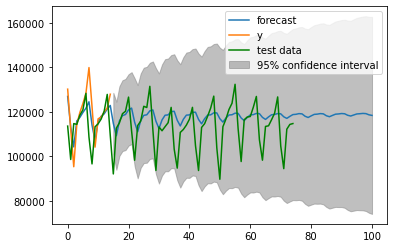

In [18]:
# Using new model to forecast 5 time steps in front of test data

model = ARIMA(train, order=(7,1,2))
fitted_model = model.fit(disp=0)

# end forecast range 10 steps in front of test data
forecasts = fitted_model.predict(len(train)-15,len(train)+len(test)+10,dynamic=True)
print(f"\nAIC Score: {fitted_model.aic}\n")


fitted_model.plot_predict(len(train)-15,len(train)+len(test)+10,dynamic=True)

plt.plot(test, 'green', label = 'test data')
leg = plt.legend(loc='upper right')
plt.show()

In [24]:
# RMSE for multi-step/output forecast
forecasts = fitted_model.predict(len(train),len(train)+len(test)-1,dynamic=True)
rmse = np.sqrt(mean_squared_error(test, forecasts))

print('Test RMSE: %.3f' % rmse)

Test RMSE: 113867.579


Part 2:
Resample the dataset to make it a weekly one. Build a regression, multistep output model, 6 weeks into the future. To be able to do this, please create features by taking 5 lag periods into consideration and you also need to create the required number of label columns in the dataset.

In [44]:
# make copy dataset of original tunnel dataset

tunnel_data_weekly = pd.read_csv('tunnel.csv')
tunnel_data_weekly.dtypes

Day            object
NumVehicles     int64
dtype: object

In [45]:
# Changing column title and shift to date time 

# change title to avoid confusion
tunnel_data_weekly = tunnel_data_weekly.rename(columns = {'Day':'Week'})

# convert back into datetime
tunnel_data_weekly['Week'] = pd.to_datetime(tunnel_data_weekly['Week']) # Convert the Week column to a datetime data type
tunnel_data_weekly.set_index('Week',inplace=True) # Set the Week column as index for the dataframe

tunnel_data_weekly


,NumVehicles
Week,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569
...,...
2005-11-12,104646
2005-11-13,94424
2005-11-14,112165


            NumVehicles
Week                   
2003-11-02       195587
2003-11-09       712728
2003-11-16       708667
2003-11-23       719211
2003-11-30       734337


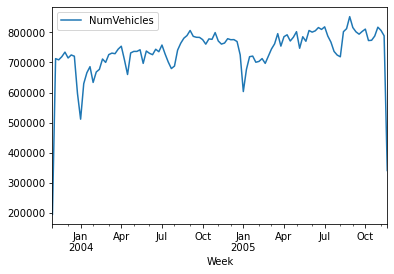

In [46]:
# Resampling data in weeks to have better visualization of data

tunnel_data_weekly = tunnel_data_weekly.resample('W').agg({'NumVehicles':'sum'}) # Aggregating columns on a Q:quarter,W:week,Y:year basis
print(tunnel_data_weekly.head())
tunnel_data_weekly.plot()
plt.show()

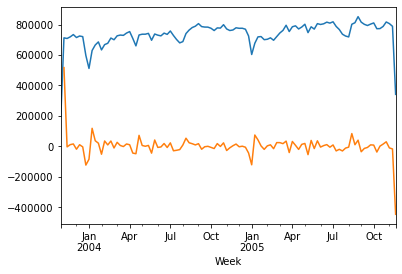

In [47]:
# Differencing data to check higher order visualization

tunnel_data_weekly["NumVehicles"].plot()
tunnel_data_weekly['NumVehicles'].diff().plot()
plt.show()

In [48]:
# Checking for stationarity

# Dicky Fuller Stationarity check - if the value is > 0.05 then it is considered non-stationary in general.

print("p-value:", adfuller(tunnel_data_weekly)[1]) # Before differencing
print("p-value:", adfuller(tunnel_data_weekly.diff().dropna())[1])  # after differencing

# The results below show that the original data is very close to stationary
# As a result we can just use original data


p-value: 5.348147072294042e-12
p-value: 4.279237700979956e-20


In [49]:
# rename data to make it easier to type

tdw_new = tunnel_data_weekly

# Function for making columns for lag values
def make_lags(ts, lags, lead_time=1):
    return pd.concat(
        {
            f'y_lag_{i}': ts.shift(i)
            for i in range(lead_time, lags + lead_time)
        },
        axis=1)


# Creating five columns of lag features
y = tdw_new.NumVehicles.copy()
X = make_lags(y, lags=5).fillna(0.0)

# function for making multistep output targe
def make_multistep_target(ts, steps):
    return pd.concat(
        {f'y_step_{i + 1}': ts.shift(-i)
         for i in range(steps)},
        axis=1)


# Making a 6 step forecasting targets
y = make_multistep_target(y, steps=6).dropna()


# Shifting has created indexes that don't match. Only keep times for
# which we have both targets and features.
y, X = y.align(X, join='inner', axis=0)

In [50]:
# Create splits

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

y_fit = pd.DataFrame(model.predict(X_train), index=X_train.index, columns=y.columns)
y_pred = pd.DataFrame(model.predict(X_test), index=X_test.index, columns=y.columns)
X_train

,y_lag_1,y_lag_2,y_lag_3,y_lag_4,y_lag_5
Week,,,,,
2003-11-02,0.0,0.0,0.0,0.0,0.0
2003-11-09,195587.0,0.0,0.0,0.0,0.0
2003-11-16,712728.0,195587.0,0.0,0.0,0.0
2003-11-23,708667.0,712728.0,195587.0,0.0,0.0
2003-11-30,719211.0,708667.0,712728.0,195587.0,0.0
...,...,...,...,...,...
2005-07-03,809713.0,815937.0,805100.0,800729.0,806147.0
2005-07-10,818306.0,809713.0,815937.0,805100.0,800729.0
2005-07-17,787719.0,818306.0,809713.0,815937.0,805100.0


In [51]:
y_train

,y_step_1,y_step_2,y_step_3,y_step_4,y_step_5,y_step_6
Week,,,,,,
2003-11-02,195587,712728.0,708667.0,719211.0,734337.0,714906.0
2003-11-09,712728,708667.0,719211.0,734337.0,714906.0,724878.0
2003-11-16,708667,719211.0,734337.0,714906.0,724878.0,720702.0
2003-11-23,719211,734337.0,714906.0,724878.0,720702.0,596945.0
2003-11-30,734337,714906.0,724878.0,720702.0,596945.0,511603.0
...,...,...,...,...,...,...
2005-07-03,818306,787719.0,767517.0,736674.0,724575.0,718840.0
2005-07-10,787719,767517.0,736674.0,724575.0,718840.0,802166.0
2005-07-17,767517,736674.0,724575.0,718840.0,802166.0,812204.0


In [52]:
# Set Matplotlib defaults
# plotting setup for graph

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)
%config InlineBackend.figure_format = 'retina'

In [53]:
# multistep plot function
def plot_multistep(y, every=1, ax=None, palette_kwargs=None):
    palette_kwargs_ = dict(palette='husl', n_colors=16, desat=None)
    if palette_kwargs is not None:
        palette_kwargs_.update(palette_kwargs)
    palette = sns.color_palette(**palette_kwargs_)
    if ax is None:
        fig, ax = plt.subplots()
    ax.set_prop_cycle(plt.cycler('color', palette))
    for date, preds in y[::every].iterrows():
        
        preds.index = pd.period_range(start=date, periods=len(preds))
        #print(date,preds)
        preds.plot(ax=ax)
    return ax


Train RMSE: 47915.94
Test RMSE: 65088.87


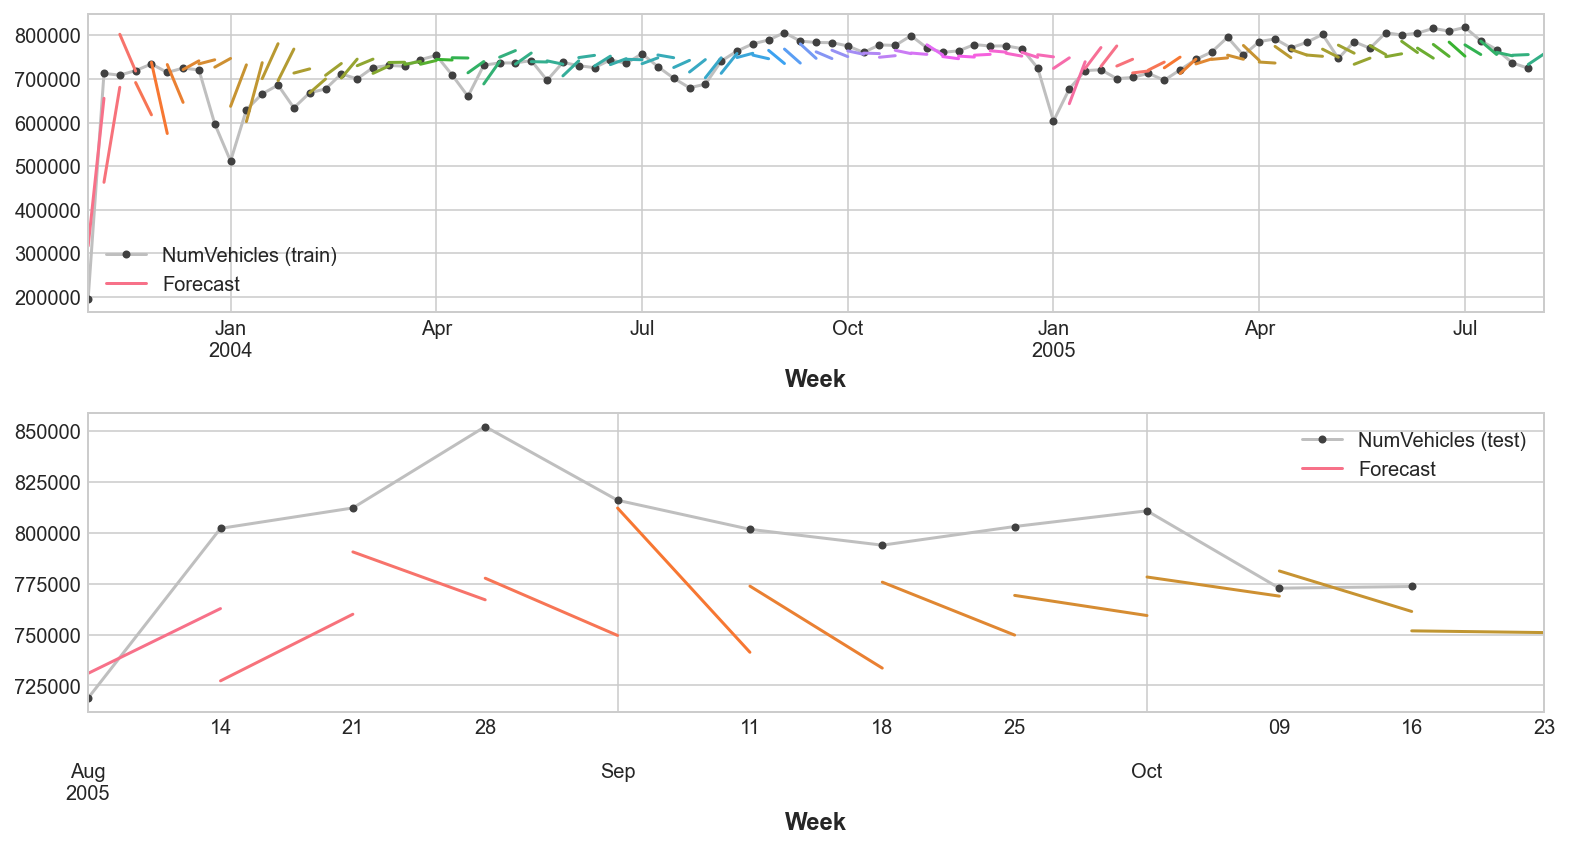

In [54]:

# import missing library
import seaborn as sns

# Calculate RMSE errors
# Plot train and test

train_rmse = mean_squared_error(y_train, y_fit, squared=False)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
print((f"Train RMSE: {train_rmse:.2f}\n" f"Test RMSE: {test_rmse:.2f}"))

palette = dict(palette='husl', n_colors=64)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11, 6))
ax1 = tdw_new.NumVehicles[y_fit.index].plot(**plot_params, ax=ax1)
ax1 = plot_multistep(y_fit, ax=ax1, palette_kwargs=palette)
_ = ax1.legend(['NumVehicles (train)', 'Forecast'])
ax2 = tdw_new.NumVehicles[y_pred.index].plot(**plot_params, ax=ax2)
ax2 = plot_multistep(y_pred, ax=ax2, palette_kwargs=palette)
_ = ax2.legend(['NumVehicles (test)', 'Forecast'])



Deliverables:

a. Single Jupyter Notebook with both parts worked out in it. Please name the file "FirstName_MP3.ipynb"
b. The exercise shall include relevant plots.
c. Answer the following questions in the last cell of the notebook:

### i. Which model had a better RMSE value? Why do you think that was the case?   

 The original single walk-forward forecast model had a lower/better RMSE value than the resampled weekly regression model. The walk forward model might have had a lower root mean squared error due to the time step prediction being only one time step in the future. For the regression model, our forecast predicted 6 time steps into the future and used resample data for the weekly model representation. Due to the resample, there is a large loss of data and information from the number of vehicles that passed per day. Additionally, the model had to predict 6 weeks in the future with the limited information that it had. As a result, the walk forward forecast had a lower RMSE value since it had more information to base the predictions on.

### ii. For the case of the single forecast ARIMA model, does the test data fall inside the confidence interval for each part?

The test data does fall within the 95% confidence interval of the walk forward forecast. When the plot is shown, I plotted the test data over a 95% confidence interval of the forecast. The green line does fall within the 95% confidence interval shadow.

### iii. What was your reasoning regarding choosing the p,d,q values?

The p,d,q values for the walk forward validation were based off of the pacf, stationary, and acf tests. For the p value, I used the partial auto correlation function to check up to what lag value there was partial correlation. Within the pacf graph, there was partial correlation until lag 7; past lag 7, the magnitude of the plot fell within the blue bounding box which indicates no correlation. This means that the 7 lag features will give useful information in the model that shows correlation between data. For the d value, I used the Dicky FUller stationary test to test for stationarity between the original data and a 1st order difference of the data. Upon 1 order of differencing, the Dicky Fuller test gave a p value of less than 5%. As a result, I used a d value of 1 to indiate stationary data after one order of differencing. For the q value, I similarly used the acf plot to check for correlation. Although there were higher order lag features that showed strong correlation, there were also multiple high order features that showed no correlation. If I picked a high order lag feature which includes many other lags with no correlation, the data would not be useful to the model. As a result, I decided to pick a q value of 2 to indicate that there is useful auto correlation up to 2 lag features.